In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

In [55]:
torch.cuda.is_available()

False

In [56]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [57]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

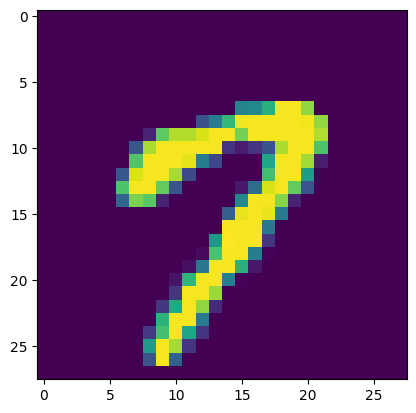

In [58]:

plt.imshow(ds_mnist[15][0].numpy()[0])

In [59]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(
    ds_mnist, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)

In [60]:
for img, label in dataloader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [61]:
class Neural_numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.act = nn.ReLU()

  def forward(self, x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)

    return out

In [62]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [63]:
model = Neural_numbers()

In [64]:
count_parameters(model)

79510

In [65]:
loss_fn = nn.CrossEntropyLoss()

In [66]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [67]:
def accuracy(pred, label):
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1) 
  return answer.mean()

In [68]:
device = 'cpu' # 'cpu' 'cuda'
model = model.to(device)
loss_fn = loss_fn.to(device)

In [69]:
epochs = 10

for epoch in range(epochs):
  loss_val = 0
  acc_val = 0
  for img, label in (pbar := tqdm(dataloader)):
    optimizer.zero_grad()
    img = img.to(device)
    label = label.to(device)
    
    label = F.one_hot(label, 10).float()
    pred = model(img)
    
    loss = loss_fn(pred, label)

    loss.backward()
    loss_item = loss.item()
    loss_val += loss_item

    optimizer.step()

    acc_current = accuracy(pred.cpu(), label.cpu())
    acc_val += acc_current

    pbar.set_description(f'loss: {loss_item:.5f}\taccuracy: {acc_current:.3f}')
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))

  0%|                                                                                         | 0/3750 [00:00<?, ?it/s]C:\Users\Olga Pavlova\AppData\Local\Temp\ipykernel_12752\188235749.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.73447	accuracy: 0.812: 100%|██████████████████████████████████████████████| 3750/3750 [00:20<00:00, 180.75it/s]


0.6389587695320448
0.8420166666666666


loss: 0.22923	accuracy: 0.938: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 163.70it/s]


0.3113121926451723
0.9113333333333333


loss: 0.51196	accuracy: 0.875: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 168.70it/s]


0.2638773117635399
0.9240833333333334


loss: 0.07979	accuracy: 1.000: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 166.82it/s]


0.22909093293411037
0.9354666666666667


loss: 0.10109	accuracy: 1.000: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 168.50it/s]


0.20275938344597816
0.9430333333333333


loss: 0.03383	accuracy: 1.000: 100%|██████████████████████████████████████████████| 3750/3750 [00:21<00:00, 177.52it/s]


0.18125179183632134
0.9491166666666667


loss: 0.13145	accuracy: 0.938: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 167.49it/s]


0.16398287885723015
0.95315


loss: 0.06748	accuracy: 1.000: 100%|██████████████████████████████████████████████| 3750/3750 [00:22<00:00, 167.14it/s]


0.14915036309696733
0.95755


loss: 0.01577	accuracy: 1.000: 100%|██████████████████████████████████████████████| 3750/3750 [00:20<00:00, 180.02it/s]


0.1367301203303039
0.9612333333333334


loss: 0.11887	accuracy: 0.938: 100%|██████████████████████████████████████████████| 3750/3750 [00:19<00:00, 193.26it/s]

0.1266017186006531
0.9639833333333333


In [70]:
accuracy(pred, label)

C:\Users\Olga Pavlova\AppData\Local\Temp\ipykernel_12752\188235749.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


0.9375

In [93]:
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.0

In [94]:
img.shape

(1, 1, 28, 28)

In [95]:
t_img = torch.from_numpy(img)
nash_pred = model(t_img)

In [96]:
F.softmax(nash_pred).detach().numpy().argmax()

C:\Users\Olga Pavlova\AppData\Local\Temp\ipykernel_12752\2895392182.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred).detach().numpy().argmax()


2

In [ ]:
img_test = ds_mnist[15][0].numpy()
img_test = np.expand_dims(img_test, axis=0)
img_test = torch.from_numpy(img_test)

In [ ]:
img_test.shape

(1, 1, 28, 28)